<a href="https://colab.research.google.com/github/Tommy3072/MineriaDeDatos/blob/main/Lab01Magna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7306 - loss: 0.5466 - val_accuracy: 0.9681 - val_loss: 0.1302
Epoch 2/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9370 - loss: 0.1645 - val_accuracy: 0.9851 - val_loss: 0.0700
Epoch 3/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9525 - loss: 0.1127 - val_accuracy: 0.9957 - val_loss: 0.0487
Epoch 4/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9690 - loss: 0.0841 - val_accuracy: 0.9872 - val_loss: 0.0478
Epoch 5/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9708 - loss: 0.0742 - val_accuracy: 0.9936 - val_loss: 0.0337
Epoch 6/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0664 - val_accuracy: 0.9936 - val_loss: 0.0342
Epoch 7/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9792 - loss: 0.0537 - val_accuracy: 0.9957 - val_loss: 0.0290
Epoch 8/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0486 - val_accuracy: 0.9809

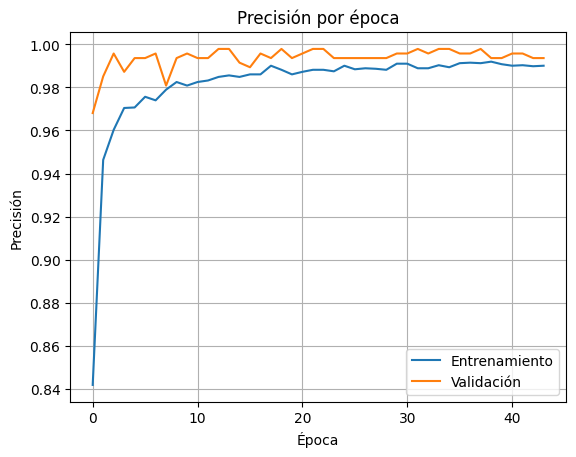

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, cohen_kappa_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# --- 1. Cargar datos normalizados ---
df = pd.read_csv("datos_normalizados.csv")

# --- 2. Crear columna binaria 'status' a partir de motor_UPDRS (ya normalizado) ---
df['status'] = df['motor_UPDRS'].apply(lambda x: 1 if x > 0.5 else 0)

# --- 3. Separar entrada (X) y salida (y) ---
X = df.drop(columns=['status', 'subject#'])  # puedes excluir más columnas si no aportan
y = df['status']

# --- 4. Dividir en entrenamiento y test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- 5. Definir arquitectura MLP con regularización ---
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# --- 6. Compilar modelo ---
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# --- 7. Entrenar con EarlyStopping ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# --- 8. Evaluación en el conjunto de prueba ---
loss, acc = model.evaluate(X_test, y_test, verbose=0)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(f"\n📊 Resultados en test:")
print(f"✔️ Precisión: {accuracy_score(y_test, y_pred):.4f}")
print(f"✔️ Sensibilidad (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"✔️ Especificidad: {recall_score(y_test, y_pred, pos_label=0):.4f}")
print(f"✔️ Precisión positiva: {precision_score(y_test, y_pred):.4f}")
print(f"✔️ AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")
print(f"✔️ Índice Kappa: {cohen_kappa_score(y_test, y_pred):.4f}")

# --- 9. Curva de entrenamiento ---
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()


131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   2%|▏         | 2/100 [00:00<?, ?it/s]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   4%|▍         | 4/100 [00:15<03:59,  2.50s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   5%|▌         | 5/100 [00:19<04:59,  3.15s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   6%|▌         | 6/100 [00:23<05:25,  3.47s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 7/100 [00:27<06:07,  3.95s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 8/100 [00:31<06:03,  3.95s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   9%|▉         | 9/100 [00:35<05:58,  3.94s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  10%|█         | 10/100 [00:41<06:37,  4.41s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  11%|█         | 11/100 [00:45<06:23,  4.31s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 12/100 [00:49<06:25,  4.38s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 13/100 [00:54<06:24,  4.41s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  14%|█▍        | 14/100 [00:58<06:15,  4.37s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  15%|█▌        | 15/100 [01:03<06:30,  4.59s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 16/100 [01:07<06:08,  4.38s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  17%|█▋        | 17/100 [01:12<06:02,  4.37s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 18/100 [01:16<06:13,  4.55s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  19%|█▉        | 19/100 [01:21<06:08,  4.55s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  20%|██        | 20/100 [01:26<06:07,  4.59s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  21%|██        | 21/100 [01:31<06:08,  4.67s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  22%|██▏       | 22/100 [01:35<05:54,  4.54s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  23%|██▎       | 23/100 [01:40<06:03,  4.72s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 24/100 [01:44<05:43,  4.52s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 25/100 [01:48<05:28,  4.37s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  26%|██▌       | 26/100 [01:54<05:50,  4.73s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 27/100 [01:58<05:32,  4.55s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  28%|██▊       | 28/100 [02:02<05:14,  4.37s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  29%|██▉       | 29/100 [02:07<05:30,  4.65s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  30%|███       | 30/100 [02:11<05:13,  4.47s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███       | 31/100 [02:16<05:28,  4.75s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  32%|███▏      | 32/100 [02:21<05:10,  4.57s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  33%|███▎      | 33/100 [02:25<04:56,  4.42s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 34/100 [02:30<05:07,  4.66s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  35%|███▌      | 35/100 [02:34<04:51,  4.48s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 36/100 [02:38<04:37,  4.34s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  37%|███▋      | 37/100 [02:43<04:49,  4.59s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  38%|███▊      | 38/100 [02:47<04:34,  4.42s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  39%|███▉      | 39/100 [02:51<04:20,  4.27s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 40/100 [02:56<04:27,  4.47s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 41/100 [03:00<04:15,  4.33s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  42%|████▏     | 42/100 [03:04<04:05,  4.24s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  43%|████▎     | 43/100 [03:09<04:17,  4.51s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  44%|████▍     | 44/100 [03:13<04:06,  4.41s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  45%|████▌     | 45/100 [03:18<04:12,  4.59s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  46%|████▌     | 46/100 [03:23<04:03,  4.50s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  47%|████▋     | 47/100 [03:27<03:51,  4.37s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  48%|████▊     | 48/100 [03:33<04:24,  5.08s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  49%|████▉     | 49/100 [03:39<04:30,  5.30s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  50%|█████     | 50/100 [03:46<04:49,  5.78s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  51%|█████     | 51/100 [03:51<04:27,  5.45s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  52%|█████▏    | 52/100 [03:55<04:01,  5.04s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  53%|█████▎    | 53/100 [04:00<03:59,  5.09s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  54%|█████▍    | 54/100 [04:04<03:40,  4.79s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  55%|█████▌    | 55/100 [04:09<03:39,  4.89s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 56/100 [04:14<03:29,  4.76s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 57/100 [04:18<03:15,  4.55s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  58%|█████▊    | 58/100 [04:23<03:20,  4.78s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 59/100 [04:27<03:06,  4.54s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  60%|██████    | 60/100 [04:31<02:55,  4.38s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  61%|██████    | 61/100 [04:37<03:02,  4.69s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  62%|██████▏   | 62/100 [04:41<02:52,  4.54s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 63/100 [04:46<02:54,  4.73s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  64%|██████▍   | 64/100 [04:51<02:52,  4.79s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  65%|██████▌   | 65/100 [04:55<02:41,  4.60s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 66/100 [05:00<02:43,  4.81s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  67%|██████▋   | 67/100 [05:05<02:32,  4.62s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 68/100 [05:09<02:23,  4.49s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  69%|██████▉   | 69/100 [05:14<02:27,  4.75s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 70/100 [05:18<02:15,  4.52s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  71%|███████   | 71/100 [05:22<02:08,  4.44s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 72/100 [05:28<02:13,  4.77s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  73%|███████▎  | 73/100 [05:32<02:03,  4.59s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  74%|███████▍  | 74/100 [05:37<02:05,  4.81s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 75/100 [05:42<01:59,  4.77s/it]

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 76/100 [05:46<01:48,  4.53s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  77%|███████▋  | 77/100 [05:51<01:50,  4.78s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  78%|███████▊  | 78/100 [05:55<01:39,  4.53s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  79%|███████▉  | 79/100 [06:00<01:33,  4.44s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  80%|████████  | 80/100 [06:05<01:34,  4.74s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  81%|████████  | 81/100 [06:09<01:27,  4.63s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 82/100 [06:14<01:24,  4.70s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  83%|████████▎ | 83/100 [06:19<01:18,  4.63s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  84%|████████▍ | 84/100 [06:23<01:12,  4.53s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  85%|████████▌ | 85/100 [06:28<01:11,  4.78s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  86%|████████▌ | 86/100 [06:33<01:04,  4.60s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  87%|████████▋ | 87/100 [06:38<01:01,  4.74s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  88%|████████▊ | 88/100 [06:43<00:58,  4.87s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  89%|████████▉ | 89/100 [06:47<00:51,  4.68s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  90%|█████████ | 90/100 [06:52<00:48,  4.88s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  91%|█████████ | 91/100 [06:57<00:42,  4.70s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  92%|█████████▏| 92/100 [07:01<00:36,  4.53s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  93%|█████████▎| 93/100 [07:06<00:33,  4.76s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  94%|█████████▍| 94/100 [07:10<00:27,  4.61s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  95%|█████████▌| 95/100 [07:14<00:22,  4.48s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  96%|█████████▌| 96/100 [07:21<00:20,  5.15s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 97/100 [07:26<00:14,  4.98s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  98%|█████████▊| 98/100 [07:31<00:10,  5.11s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  99%|█████████▉| 99/100 [07:35<00:04,  4.80s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 100/100 [07:39<00:00,  4.58s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer: 101it [07:45,  4.70s/it]
<ipython-input-6-31e8588cc223>:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


AssertionError: Feature and SHAP matrices must have the same number of rows!

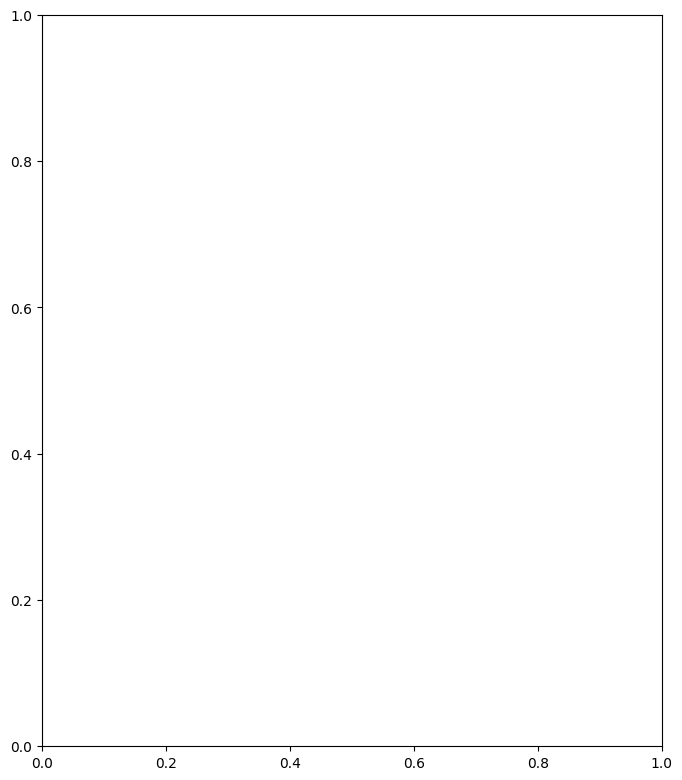

In [6]:
import shap

X_sample = X_test.sample(100, random_state=42)
explainer = shap.Explainer(model.predict, X_sample)
shap_values = explainer(X_sample)

shap.summary_plot(shap_values, X_test)
